In [3]:
import numpy as np
import pandas as pd
import os
import pymc3
import seaborn as sns

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
df = pd.read_csv('final.csv')
df

,Unnamed: 0,County_Name,population,pop_below_poverty,pct_below_poverty,Earnings by place of work,Employee and self-employed contributions for government social insurance,Employer contributions for employee pension and insurance funds 8,Employer contributions for government social insurance,Equals: Net earnings by place of residence,...,Employment_Transportation_Equipment_Manufacturing,Employment_Transportation_and_Warehousing,Employment_Truck_Transportation,Employment_Utilities,Employment_Warehousing_and_Storage,Employment_Waste_Management_and_Remediation_Services,Employment_Water_Transportation,Employment_Wholesale_Electronic_Markets_and_Agents_and_Brokers,Employment_Wholesale_Trade,Employment_Wood_Product_Manufacturing
0,0,Accomack County,"32,325","6,141",19.00%,1119986,67460,181644,129706,858335,...,NaN,114.0,57.0,168.0,NaN,NaN,NaN,NaN,130.0,NaN
1,1,Albemarle County,"100,293","9,142",9.10%,8516598,503727,1099244,847618,6196611,...,NaN,682.0,65.0,NaN,9.0,76.0,NaN,24.0,447.0,154.0
2,2,Alleghany County,"14,830","2,925",19.70%,501496,38180,65423,58456,412284,...,NaN,18.0,15.0,NaN,NaN,NaN,NaN,NaN,27.0,96.0
3,3,Amelia County,"12,861","1,375",10.70%,170244,13804,19010,15622,353626,...,NaN,104.0,41.0,NaN,NaN,NaN,NaN,3.0,117.0,117.0
4,4,Amherst County,"30,994","4,327",14.00%,469950,38937,64076,49606,661161,...,NaN,282.0,228.0,NaN,NaN,NaN,NaN,NaN,175.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,Portsmouth city,"91,156","15,312",16.80%,4430689,246547,849649,514532,2223456,...,319.0,1807.0,365.0,66.0,NaN,236.0,NaN,3.0,594.0,NaN
101,101,Richmond city,"216,099","50,200",23.20%,14931755,881642,1780724,1531298,7437338,...,9.0,4809.0,2326.0,4678.0,220.0,488.0,NaN,42.0,4202.0,43.0
102,102,Roanoke city,"97,449","20,240",20.80%,4663469,291624,554444,539960,2261475,...,349.0,4007.0,837.0,674.0,802.0,153.0,NaN,39.0,3244.0,NaN
103,103,Suffolk city,"89,418","9,267",10.40%,2388109,156009,292172,262554,3043349,...,NaN,2375.0,258.0,NaN,1982.0,32.0,NaN,16.0,1207.0,NaN


In [5]:
cols = ['pop_below_poverty','pct_below_povery']

In [ ]:
counties = len(County_Name)

In [11]:
# pretty much teh same model as last time, but with more uniform distributions
with pm.Model() as hierarchical_model:
    
    # Hyperpriors for group nodes
    mu_a = pm.Normal("mu_alpha", mu=0.0, sigma=100 ** 2)
    sigma_a = pm.Uniform("sigma_alpha", lower=0, upper=100)
    mu_b = pm.Normal("mu_beta", mu=0.0, sigma=100 ** 2)
    sigma_b = pm.Uniform("sigma_beta", lower=0, upper=100)

    # slopes and intercepts for each county
    a = pm.Normal("alpha", mu=mu_a, sigma=sigma_a, shape=County_Name)
    b = pm.Normal("beta", mu=mu_b, sigma=sigma_b, shape=County)
    
    # Model error
    eps = pm.Uniform("eps", lower=0, upper=100)
    
    # Linear regression: same thing as last time
    radon_est = a[county_idx_t] + b[county_idx_t] * floor_t
    
    # Data likelihood
    radon_like = pm.Normal(
        "radon_like", mu=radon_est, sigma=eps, observed=log_radon_t, total_size=len(data)
    )

<AxesSubplot:>

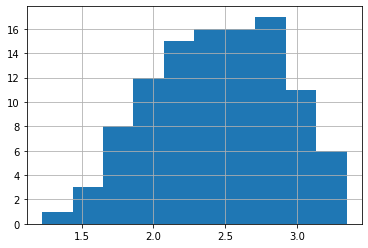

In [15]:
# def my_logit(num):
#         return np.log(num) - np.log(100-num)
df.pct_below_poverty.str.replace('%','').astype(float).apply(np.log).hist()

In [17]:
df.dropna(axis=1)

,Unnamed: 0,County_Name,population,pop_below_poverty,pct_below_poverty,Earnings by place of work,Employee and self-employed contributions for government social insurance,Employer contributions for employee pension and insurance funds 8,Employer contributions for government social insurance,Equals: Net earnings by place of residence,...,Wage and salary employment,Wages and salaries,year,Employment_Accommodation_and_Food_Services,Employment_Construction,Employment_Other_Services_(except_Public_Administration),"Employment_Religious,_Grantmaking,_Civic,_Professional,_and_Similar_Organizations",Employment_Retail_Trade,Employment_Specialty_Trade_Contractors,Employment_Total
0,0,Accomack County,"32,325","6,141",19.00%,1119986,67460,181644,129706,858335,...,16125,796174,2019,1010.0,291.0,395.0,245.0,1337.0,160.0,9075.0
1,1,Albemarle County,"100,293","9,142",9.10%,8516598,503727,1099244,847618,6196611,...,109597,6142794,2019,4921.0,2292.0,1637.0,827.0,6924.0,1631.0,41641.0
2,2,Alleghany County,"14,830","2,925",19.70%,501496,38180,65423,58456,412284,...,8336,389176,2019,400.0,133.0,197.0,111.0,396.0,70.0,2533.0
3,3,Amelia County,"12,861","1,375",10.70%,170244,13804,19010,15622,353626,...,2802,109218,2019,120.0,466.0,102.0,43.0,244.0,382.0,1925.0
4,4,Amherst County,"30,994","4,327",14.00%,469950,38937,64076,49606,661161,...,8636,347601,2019,634.0,484.0,310.0,199.0,1139.0,374.0,6136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,Portsmouth city,"91,156","15,312",16.80%,4430689,246547,849649,514532,2223456,...,52713,3170261,2019,2778.0,2157.0,1811.0,743.0,3184.0,1244.0,25744.0
101,101,Richmond city,"216,099","50,200",23.20%,14931755,881642,1780724,1531298,7437338,...,172888,11222461,2019,15493.0,5691.0,8427.0,5368.0,9742.0,3428.0,128474.0
102,102,Roanoke city,"97,449","20,240",20.80%,4663469,291624,554444,539960,2261475,...,71378,3630651,2019,6679.0,3334.0,2591.0,1148.0,8857.0,1899.0,75238.0
103,103,Suffolk city,"89,418","9,267",10.40%,2388109,156009,292172,262554,3043349,...,34986,1820896,2019,3526.0,1196.0,1469.0,771.0,4119.0,636.0,25065.0
